Exception: input array type is not double

In [11]:
from addons.stock_manage.models.stock_manage import StocksBase
from addons.stock_manage.models.stock_manage import StockDaily

res = (StockDaily.select(StockDaily.close).
        where((StockDaily.ts_code == "300166.SZ") & 
        (StockDaily.trade_date.between('2022-01-01', '2023-03-27'))).order_by(StockDaily.trade_date))
print(res)

SELECT "t1"."close" FROM "stock_daily" AS "t1" WHERE (("t1"."ts_code" = '300166.SZ') AND ("t1"."trade_date" BETWEEN '2022-01-01' AND '2023-03-27')) ORDER BY "t1"."trade_date"


1
0


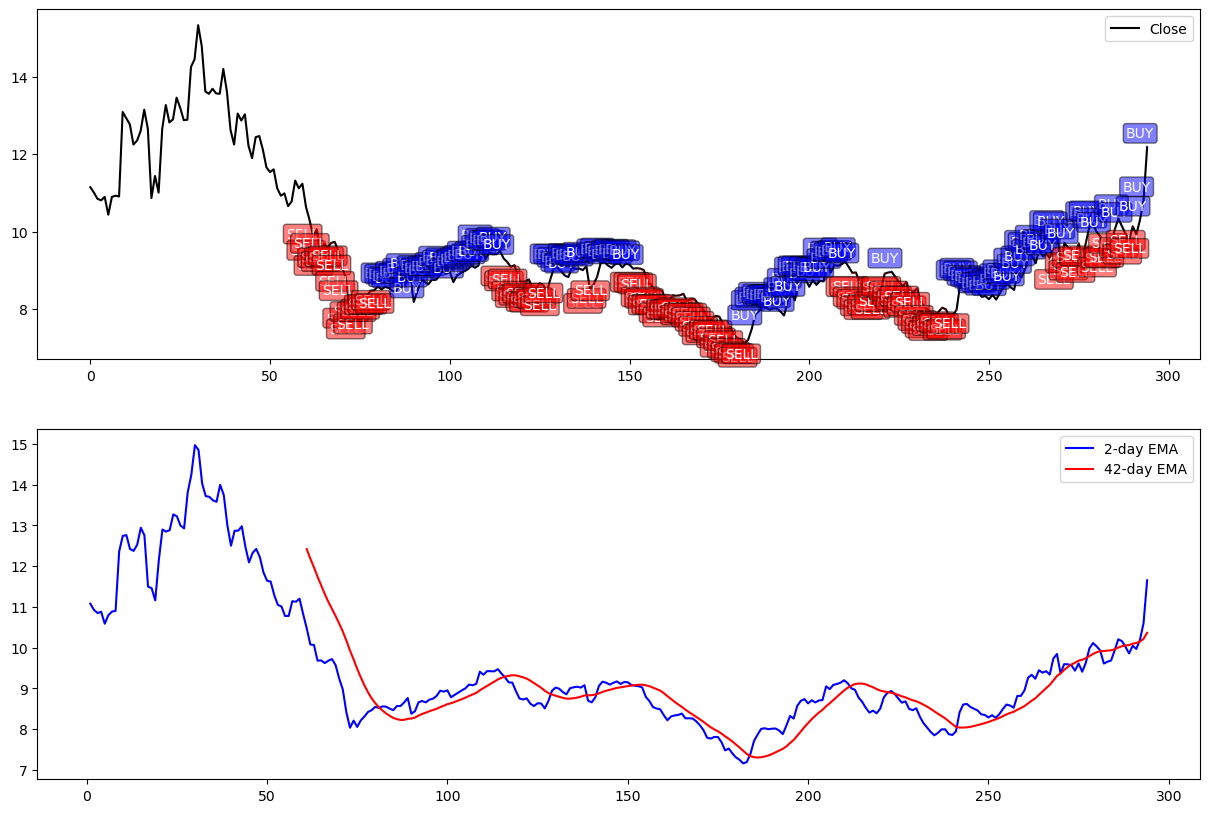

In [13]:
import talib
import numpy as np
import matplotlib.pyplot as plt

# 假设有一个价格序列
close_prices = np.array([raw.close for raw in res])

# 计算2日EMA
ema2 = talib.EMA(close_prices, timeperiod=2)

# 计算21日斜率
slope21 = talib.LINEARREG_SLOPE(close_prices, timeperiod=21) * 20 + close_prices

# 计算42日EMA
ema42 = talib.EMA(slope21, timeperiod=42)

# 计算买入和卖出信号
buy_signal = np.where(ema2 > ema42, 1, 0)
sell_signal = np.where(ema2 < ema42, 1, 0)
print(buy_signal[-1])
print(sell_signal[-1])

# 绘制K线图和指标图
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(close_prices, color='black', label='Close')
ax[0].legend()

ax[1].plot(ema2, color='blue', label='2-day EMA')
ax[1].plot(ema42, color='red', label='42-day EMA')
ax[1].legend()
for i in range(len(close_prices)):
    if buy_signal[i] == 1:
        ax[0].annotate('BUY', xy=(i, close_prices[i]), xytext=(-5, 5), textcoords='offset points',
                       color='white', va='bottom', ha='center', bbox=dict(boxstyle='round,pad=0.2', fc='blue', alpha=0.5),
                       arrowprops=dict(arrowstyle='-', color='blue', alpha=0.5))
    elif sell_signal[i] == 1:
        ax[0].annotate('SELL', xy=(i, close_prices[i]), xytext=(-5, -5), textcoords='offset points',
                       color='white', va='top', ha='center', bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.5),
                       arrowprops=dict(arrowstyle='-', color='red', alpha=0.5))

plt.show()